In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

## Veri yükleme:

In [3]:
location_1 = pd.read_csv("Location1.csv")
location_1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
location_1.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606
43799,2021-12-31 23:00:00,35.0,97,34.2,2.26,5.04,45,51,4.3,0.2877


In [5]:
location_1.isnull().sum() #Veri temiz gözüküyor

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [6]:
print(location_1.Time.dtype)
location_1 = location_1.set_index('Time')
location_1.index = pd.to_datetime(location_1.index)


object


## Veri Görselleştirme: Veriyi Anlama

### Time-Power

#### Genel

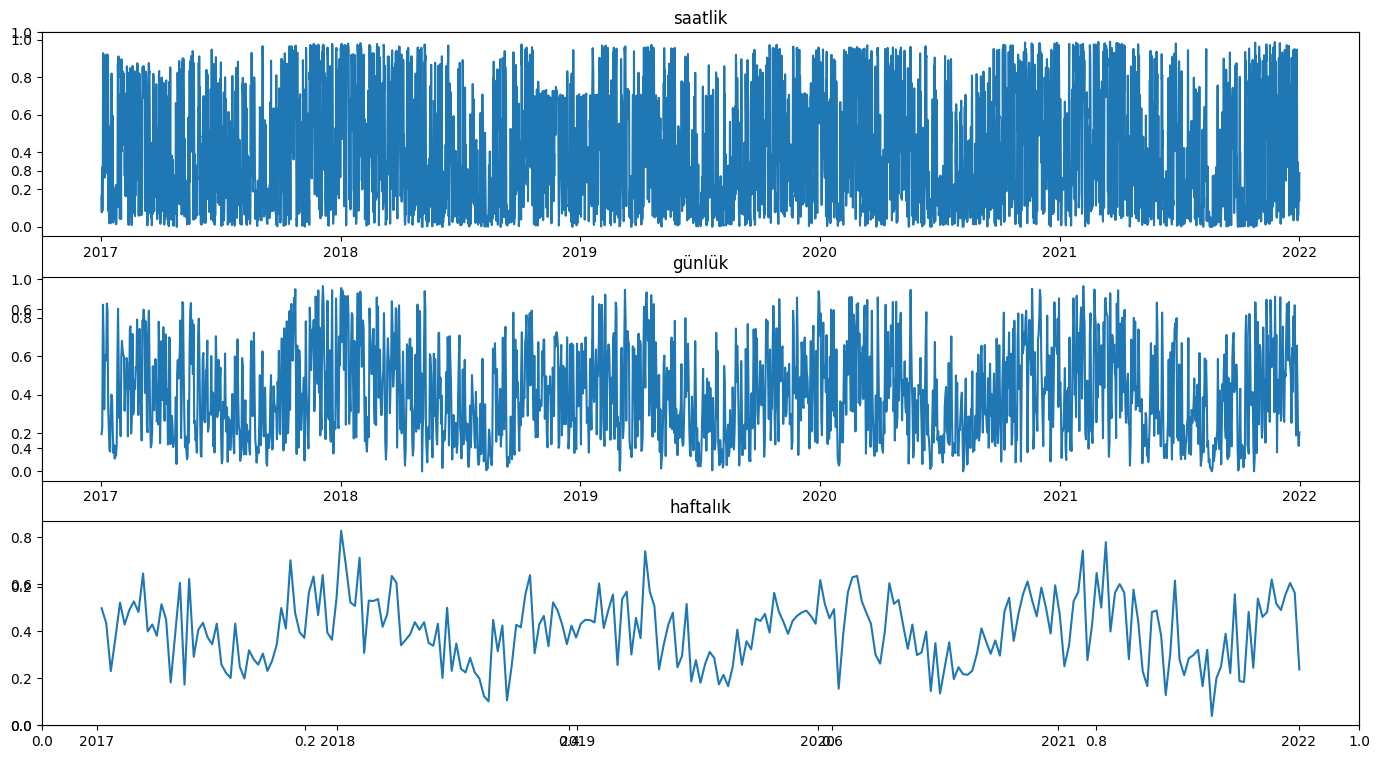

In [7]:
günlük_df = location_1.resample('D').sum() / 24
haftalik_df = location_1.resample('W').sum() / 168

fig, ax = plt.subplots(figsize=(17, 9)) 
ax1=fig.add_subplot(311)
plt.plot(location_1.index,location_1.Power)
plt.title("saatlik")
ax1=fig.add_subplot(312)
plt.plot(günlük_df.index,günlük_df.Power)
plt.title("günlük")
ax1=fig.add_subplot(313)
plt.plot(haftalik_df.index,haftalik_df.Power)
plt.title("haftalık")
plt.show()

#### Günlük

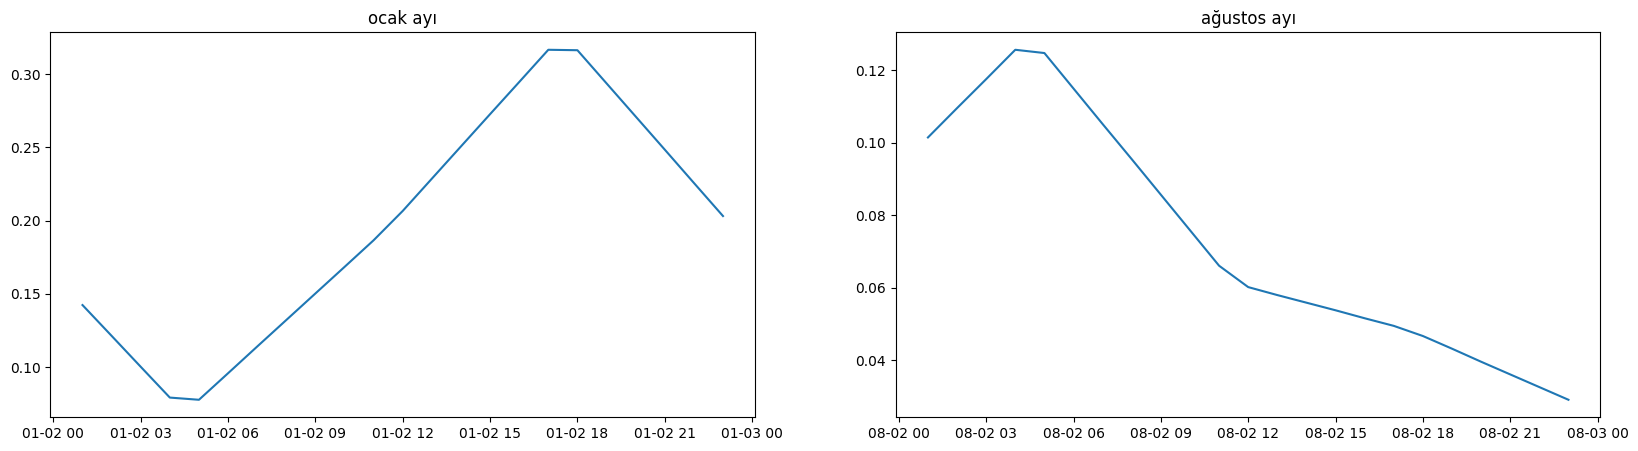

In [8]:
fig,axs = plt.subplots(1,2, figsize=(20,5))
günlük1 = location_1.loc[ (location_1.index>"2017-01-02 00:00:00") & (location_1.index<"2017-01-03 00:00:00")].Power
günlük2 = location_1.loc[ (location_1.index>"2017-08-02 00:00:00") & (location_1.index<"2017-08-03 00:00:00")].Power
axs[0].plot(günlük1)
axs[0].set_title("ocak ayı")
axs[1].plot(günlük2)
axs[1].set_title("ağustos ayı")
plt.show()

#### Haftalık

([<matplotlib.lines.Line2D at 0x2469228aaa0>],
 Text(0.5, 1.0, '2020 temmuz ayı haftası'))

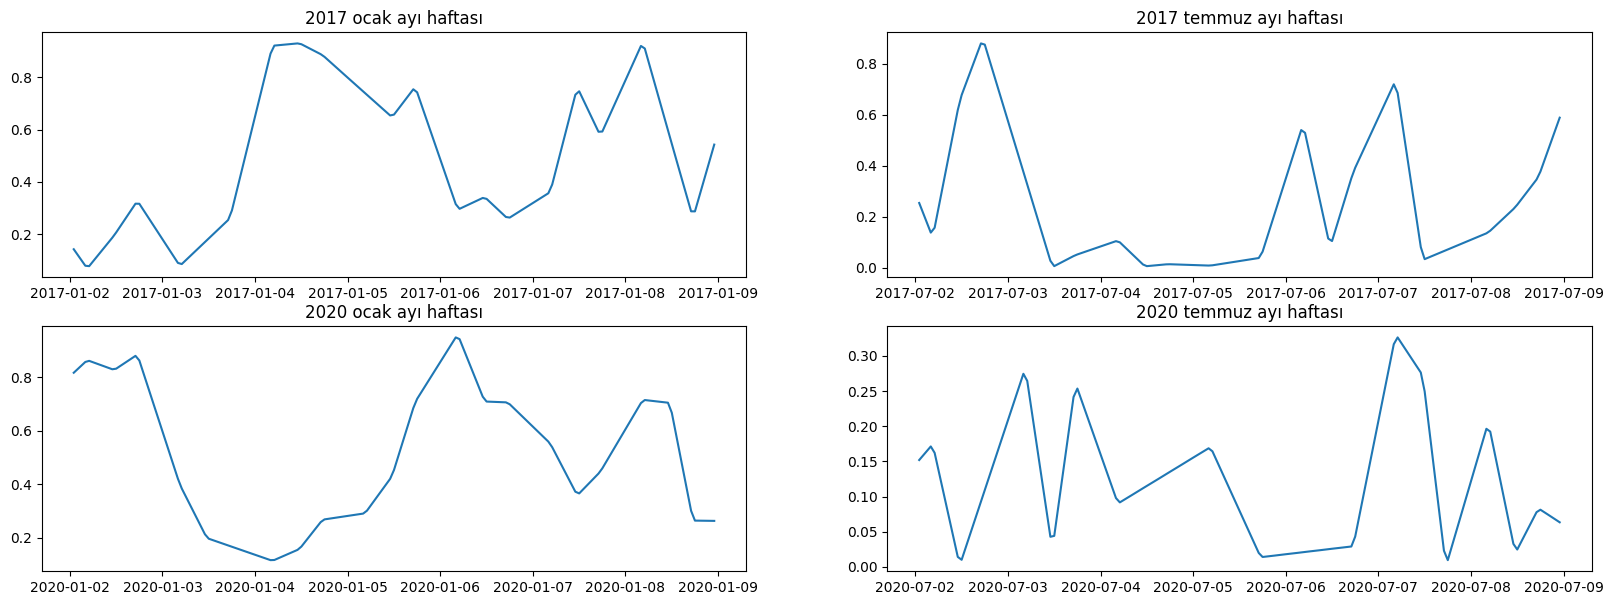

In [9]:
fig,axs = plt.subplots(2,2, figsize=(20,7))
hafta1 = location_1.loc[ (location_1.index >"2017-01-02 00:00:00")&(location_1.index <"2017-01-09 00:00:00")] # 2017 ocak ayı haftası
hafta2 = location_1.loc[ (location_1.index >"2017-07-02 00:00:00")&(location_1.index <"2017-07-09 00:00:00")] # 2017 temmuz ayı haftası
hafta3 = location_1.loc[ (location_1.index >"2020-01-02 00:00:00")&(location_1.index <"2020-01-09 00:00:00")] # 2020 ocak ayı haftası
hafta4 = location_1.loc[ (location_1.index >"2020-07-02 00:00:00")&(location_1.index <"2020-07-09 00:00:00")] # 2020 temmuz ayı haftası
axs[0,0].plot(hafta1.Power),axs[0,0].set_title("2017 ocak ayı haftası")
axs[0,1].plot(hafta2.Power),axs[0,1].set_title("2017 temmuz ayı haftası")
axs[1,0].plot(hafta3.Power),axs[1,0].set_title("2020 ocak ayı haftası")
axs[1,1].plot(hafta4.Power),axs[1,1].set_title("2020 temmuz ayı haftası")


#### Aylık

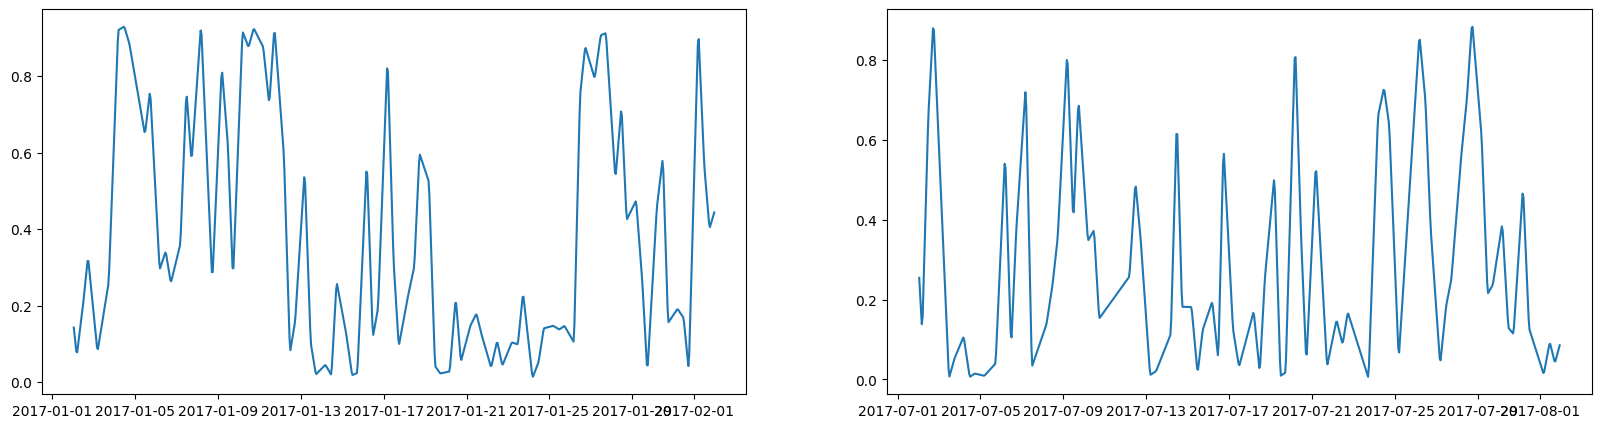

In [10]:
fig,axs = plt.subplots(1,2, figsize=(20,5))
aylik1 = location_1.loc[ (location_1.index > "2017-01-02 00:00:00") & (location_1.index < "2017-02-02 00:00:00") ] # 2017 ocak ayı
aylik2 = location_1.loc[ (location_1.index > "2017-07-02 00:00:00") & (location_1.index < "2017-08-02 00:00:00") ] # 2017 temmuz ayı

axs[0].plot(aylik1.Power)
axs[1].plot(aylik2.Power)

### Weather-Power

In [11]:
# Sıcaklık, bağıl nem, serbest nem, rüzgar hızı(10m ve 100m yükseklikte), rüzgar yönü(10m ve 100m yükseklikte), rüzgar esintileri(10m)
# Bunların güç üretimi ile direkt bağlantısını inceleyelim.

In [12]:
location_1.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


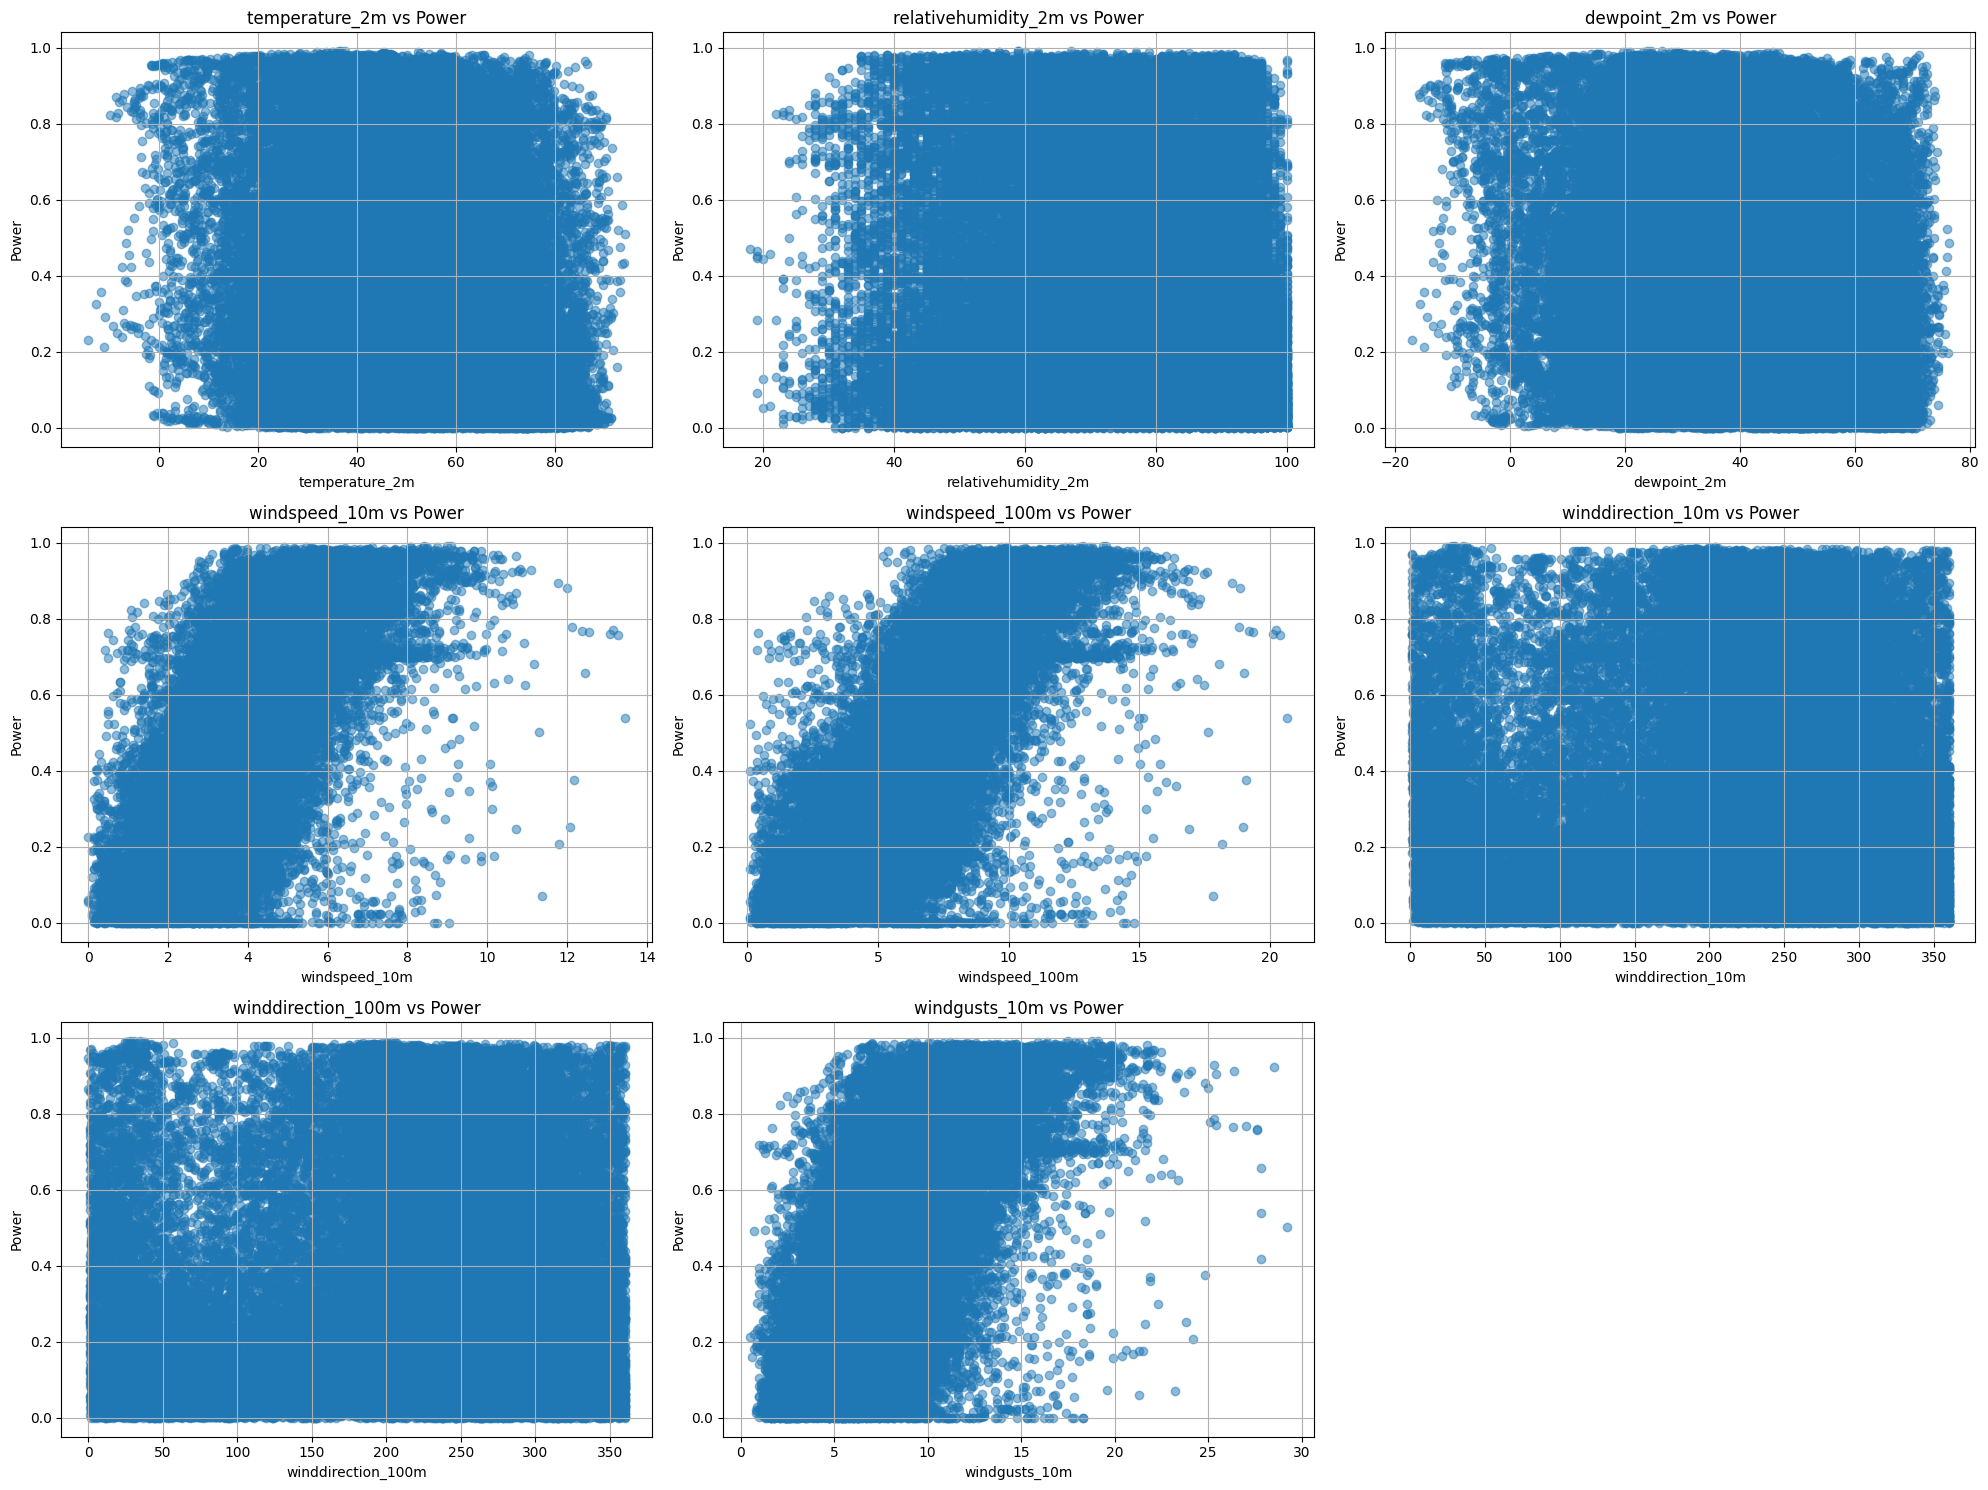

In [13]:
features = ["temperature_2m",	"relativehumidity_2m",	"dewpoint_2m"	,"windspeed_10m",	"windspeed_100m",	"winddirection_10m",	"winddirection_100m"	,"windgusts_10m"]
target = 'Power'

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(location_1[feature], location_1[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)

plt.tight_layout()

1-Esinti ile rüzgar hızı çok benzer.10m yi çıkartıp 100 ile etkisine bakılınabilir.    
2-Rüzgar yönünü N-W-E-S şeklinde 1-2-3-4 diye kodlayarak incelemek istiyorum. derece olarak çok faydalı gözükmüyor.  
3-Sıcaklığın etkisine sıcaklıkla rüzgar arasındaki ilişkiye bakarak karar vereceğim.  
4-bağıl nem ve serbest nemin çok fazla etkisinin olduğunu düşünmüyorum. dolaylı yoldan rüzgar hızını etkiliyor olabilir. direkt çıkartılabilirim.

In [14]:
# Dereceyi değiştirelim:
bins = [0, 90, 180, 270, 360]  # aralık sınırları
labels = [1, 2, 3, 4]  # etiketler
location_1['winddirection_10m'] = pd.cut(location_1['winddirection_10m'], bins=bins, labels=labels, include_lowest=True)
location_1['winddirection_100m'] = pd.cut(location_1['winddirection_100m'], bins=bins, labels=labels, include_lowest=True)

# Yön Kategorisi sütununu yazdırın
location_1[['winddirection_10m', 'winddirection_100m']].head()

,winddirection_10m,winddirection_100m
Time,,
2017-01-02 00:00:00,2,2
2017-01-02 01:00:00,2,2
2017-01-02 02:00:00,2,2
2017-01-02 03:00:00,1,2
2017-01-02 04:00:00,1,1


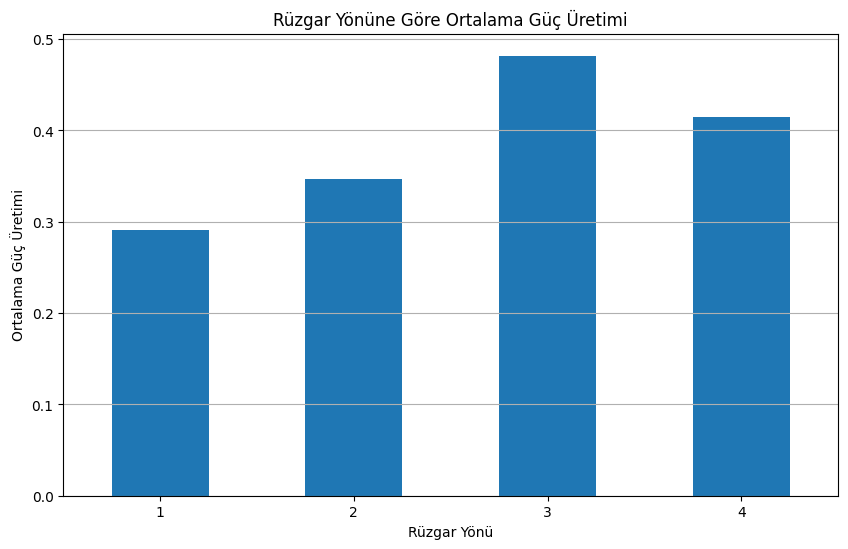

In [15]:
# Rüzgar yönlerinin güç üretimine etkisi:

mean_power_by_wind_direction = location_1.groupby('winddirection_100m')['Power'].mean()

plt.figure(figsize=(10, 6))
mean_power_by_wind_direction.plot(kind='bar')
plt.title('Rüzgar Yönüne Göre Ortalama Güç Üretimi')
plt.xlabel('Rüzgar Yönü')
plt.ylabel('Ortalama Güç Üretimi')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()    

# 180-270 dereceler arası en iyi verim aralığı

In [16]:
location_1["winddirection_10m"] = location_1["winddirection_10m"].astype(int)
location_1["winddirection_100m"] = location_1["winddirection_100m"].astype(int)

In [17]:
location_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2017-01-02 00:00:00 to 2021-12-31 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_2m       43800 non-null  float64
 1   relativehumidity_2m  43800 non-null  int64  
 2   dewpoint_2m          43800 non-null  float64
 3   windspeed_10m        43800 non-null  float64
 4   windspeed_100m       43800 non-null  float64
 5   winddirection_10m    43800 non-null  int32  
 6   winddirection_100m   43800 non-null  int32  
 7   windgusts_10m        43800 non-null  float64
 8   Power                43800 non-null  float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 3.0 MB


## Model

Şimdi elimizdeki özellikler ile birkaç model deneyelim.  
Özelliklerin model sonucuna etkisine göre modelden çıkartma yapabiliriz.

### Validation seti:

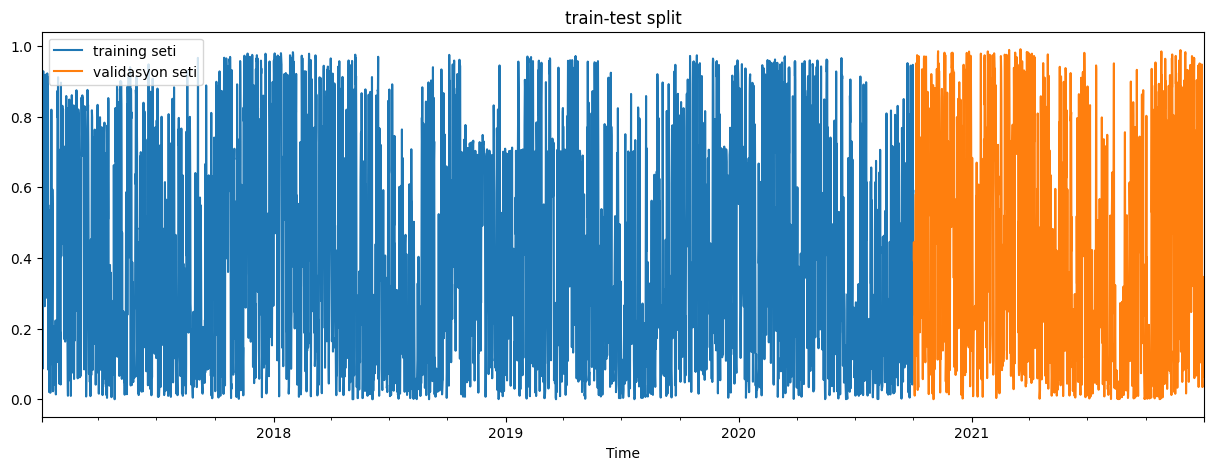

In [18]:
# Veri 2017 ocak - 2021 aralık aralık arasını kapsıyor.
# Verinin sonda kalan 4'te birini test seti yapalım.(2020 ekim'e kadar)
train = location_1.loc[location_1.index < "2020-10-02 00:00:00"]
valid = location_1.loc[location_1.index >= "2020-10-02 00:00:00"]

fig, ax = plt.subplots(figsize=(15,5))
train["Power"].plot(ax=ax, label="Train",title="train-test split")
valid["Power"].plot(ax=ax,label="Test")
ax.axvline("01-01-2015",color="black",ls="--")
ax.legend(["training seti","validasyon seti"])
plt.show()

### Modeller:

##### XGBRegressor

In [19]:
features = ["temperature_2m",	"relativehumidity_2m",	"dewpoint_2m"	,"windspeed_10m",	"windspeed_100m",	"winddirection_10m",	"winddirection_100m"	,"windgusts_10m"]
X_train = train[features]
y_train = train["Power"]
X_valid = valid[features]
y_valid = valid["Power"]

import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_reate=0.01)
reg.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_valid,y_valid)],
        verbose=100 )


[14:20:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learning_reate" } are not used.

[0]	validation_0-rmse:0.23982	validation_1-rmse:0.25108
[64]	validation_0-rmse:0.13624	validation_1-rmse:0.17281


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             learning_reate=0.01, max_bin=256, max_cat_threshold=64,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

<AxesSubplot:title={'center':'özellik etkisi sıralaması'}>

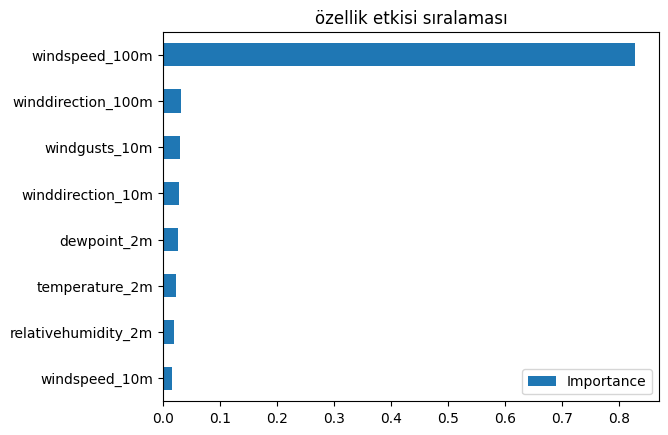

In [20]:
# Önemli Özellikler:
öö = pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=["Importance"])
öö.sort_values("Importance").plot(kind="barh",title="özellik etkisi sıralaması")

xgboosta göre 100 metredeki rüzgar şiddeti hariç geri kalanların çok bir etkisi yok

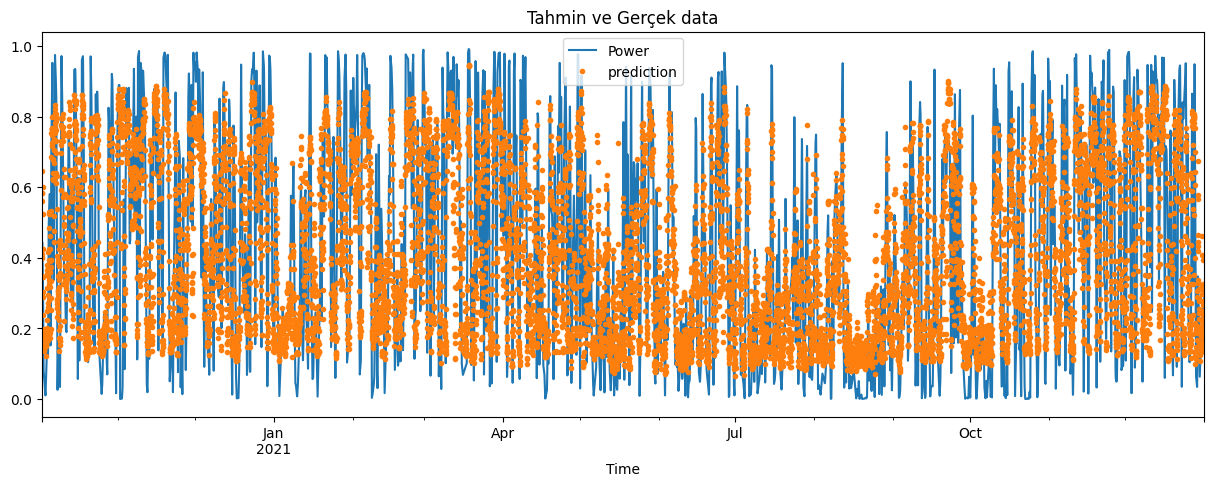

In [21]:
valid_pred = reg.predict(X_valid)
valid_pred = pd.DataFrame(valid_pred,columns=["prediction"])
valid_pred.index = valid.index

valid_xgb = pd.concat([valid["Power"], valid_pred], axis=1)

ax = valid_xgb[["Power"]].plot(figsize=(15,5))
valid_xgb["prediction"].plot(ax=ax,style=".")
plt.legend()
ax.set_title("Tahmin ve Gerçek data")
plt.show()

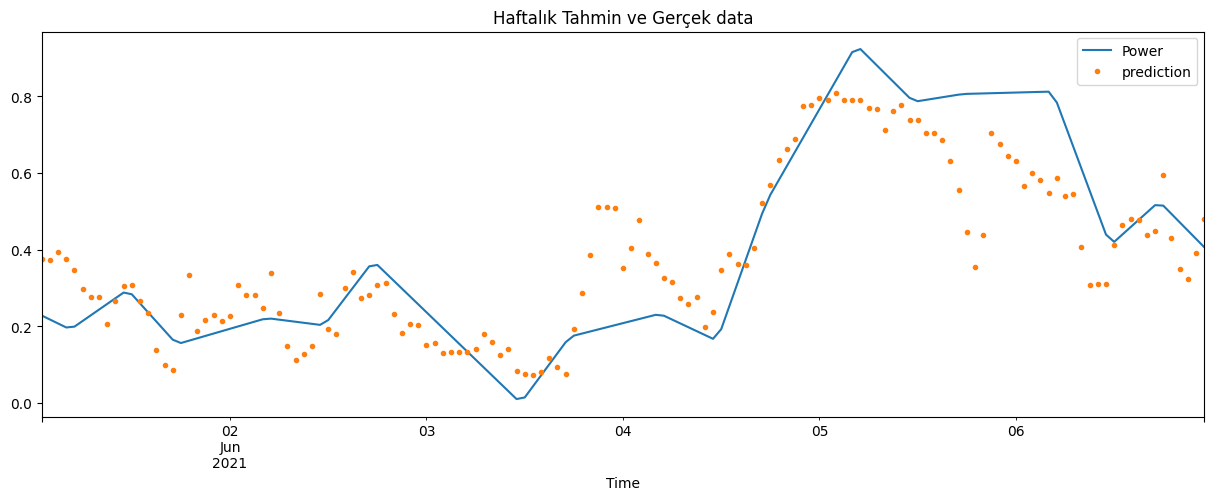

In [22]:
ax = valid_xgb["Power"].loc[ (valid_xgb.index > "2021-06-01") & (valid_xgb.index < "2021-06-07") ].plot(figsize=(15,5))
valid_xgb["prediction"].loc[ (valid_xgb.index > "2021-06-01") & (valid_xgb.index < "2021-06-07") ].plot(ax=ax,style=".")
plt.legend()
ax.set_title("Haftalık Tahmin ve Gerçek data")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(valid["Power"],valid_xgb["prediction"]))
print(f"root mean square error skoru: {score:0.2f}")

root mean square error skoru: 0.17


##### VAR (Vector Auto Regression):

VAR MODEL NOTLAR:  
model(endog=train): bağımlı değişkenlerin eğitim veri setinde bulunduğunu belirtir. Yani, "train" veri seti içindeki değişkenler, VAR modelinin eğitim için kullanılacak olan bağımlı değişkenleridir.  

Prediction arrayinde bütün kolonlar tahmin ediliyor:VAR modeli çalıştırdığınızda, tahmin edilen matriste sadece güç üretimi değil, aynı zamanda diğer endojen değişkenlerin (örneğin, hava durumu) de tahmin edilmiş değerlerini görebilirsiniz. Bu durum oldukça normaldir çünkü VAR modeli, değişkenler arasındaki ilişkileri anlamak ve bu ilişkileri kullanarak gelecekteki değerleri tahmin etmek için tasarlanmıştır.





VAR MODEL EQUATION:  

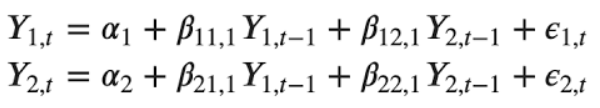

In [24]:
train.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,2,2,1.4,0.1635
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,2,2,4.4,0.1424
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,2,2,3.2,0.1214
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,1,2,1.6,0.1003
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,1,1,4.0,0.0793


In [25]:
valid.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2020-10-02 00:00:00,45.7,89,42.6,4.46,7.94,4,4,10.0,0.3936
2020-10-02 01:00:00,45.6,88,42.2,4.08,7.43,4,4,8.7,0.4064
2020-10-02 02:00:00,45.5,88,42.0,4.19,7.42,4,4,8.3,0.4191
2020-10-02 03:00:00,45.0,89,42.0,3.83,6.80,4,4,8.1,0.4318
2020-10-02 04:00:00,44.9,93,42.9,3.09,5.73,4,4,7.3,0.4446


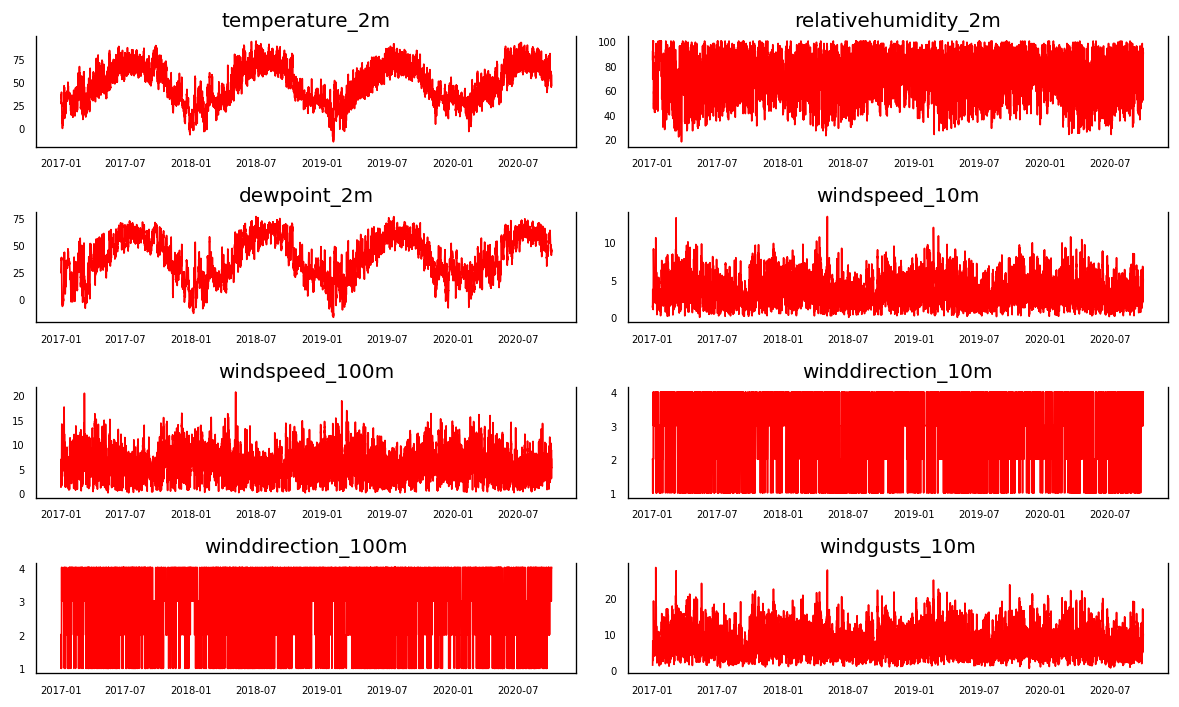

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = train[train.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(train.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

-tempreture2m, dewpoint2m  
-windspeed100m, windspeed10m, windgust10m  
-winddirection10m, winddirection100m   
verileri korleastona sahip olabilir.

Zaman serisi analizlerinde durağanlık önemli bir konudur. Durağa olmayan veri setleriyle çalışmak gneellikle zordur ve güvenilir modeller elde etmek güçleşir.  
  
Durağanlığı test etmek amacıyla özelliklerin p-değerleri incelenir. Yüksek p-değeri(0.05'ten yüksek) durağan(stationary) kabul edilmez.  
  
Durağan olmayan zaman serilerini durağan hale getirmek için differencing methodu uygulanabilir. Bu method n. değeri n-1. değerden çıkararak ardışıklar arasındaki farkı değer ile değiştirir ve mevsimsellik gibi uzun vadeli bağımlılıkları durağan hale getirir.

In [27]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

ad_fuller_result_1 = adfuller(train['temperature_2m'])#.diff()[1:]) p değeri yüksek çıksaydı uygulayacktım ancak durağan çıktı.
print('temperature_2m')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(train['dewpoint_2m'])#.diff()[1:])

print('dewpoint_2m')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

temperature_2m
ADF Statistic: -6.088580319523538
p-value: 1.0497826298674257e-07

---------------------

dewpoint_2m
ADF Statistic: -6.922924092623224
p-value: 1.1342995523302573e-09


In [28]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

ad_fuller_result_1 = adfuller(train['windspeed_100m'])#.diff()[1:]) p değeri yüksek çıksaydı uygulayacktım ancak durağan çıktı.
print('windspeed_100m')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(train['windspeed_10m'])#.diff()[1:])

print('windspeed_10m')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(train['windgusts_10m'])#.diff()[1:])

print('windgusts_10m')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

windspeed_100m
ADF Statistic: -20.04501148674702
p-value: 0.0

---------------------

windspeed_10m
ADF Statistic: -20.854252158758513
p-value: 0.0

---------------------

windgusts_10m
ADF Statistic: -22.299518760854117
p-value: 0.0


In [29]:
ad_fuller_result_1 = adfuller(train['Power'])#.diff()[1:]) p değeri yüksek çıksaydı uygulayacktım ancak durağan çıktı.
print('Power')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

Power
ADF Statistic: -17.911663897088943
p-value: 2.9280127994482e-30


Benzer olan veri özellikleri arasında korelasyonu inceleyelim yüksek korelasyon varsa özelliği kullanmaycağım.

In [30]:
correlation_temprature = train[['temperature_2m', 'dewpoint_2m']].corr()
print(correlation_temprature)

                temperature_2m  dewpoint_2m
temperature_2m        1.000000     0.937337
dewpoint_2m           0.937337     1.000000


In [31]:
correlation_temprature = train[['windgusts_10m', 'windspeed_100m']].corr()
print(correlation_temprature)

                windgusts_10m  windspeed_100m
windgusts_10m        1.000000        0.817683
windspeed_100m       0.817683        1.000000


In [32]:
correlation_temprature = train[['windspeed_10m', 'windspeed_100m']].corr()
print(correlation_temprature)

                windspeed_10m  windspeed_100m
windspeed_10m        1.000000        0.932441
windspeed_100m       0.932441        1.000000


In [33]:
correlation_temprature = train[['relativehumidity_2m', 'Power']].corr()
print(correlation_temprature)

                     relativehumidity_2m     Power
relativehumidity_2m             1.000000 -0.056431
Power                          -0.056431  1.000000


Granger nedensellik testi, bir zaman serisinin başka bir zaman serisini ne ölçüde açıkladığını veya tahmin edebildiğini analiz etmek için kullanılan bir yöntemdir.  
p değeri düşük çıkar ise örneğin rüzgar-power arasında bir nedensellik ilişki var anlamı çıkartılabilir.


In [115]:
print('wind causes power?\n')
print('------------------')
granger_1 = grangercausalitytests(train[['Power', 'windspeed_100m']], 4)

print('tempreture causes power?\n')
print('------------------')
granger_1 = grangercausalitytests(train[['Power', 'temperature_2m']], 4)

wind causes power?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=252.0660, p=0.0000  , df_denom=32852, df_num=1
ssr based chi2 test:   chi2=252.0891, p=0.0000  , df=1
likelihood ratio test: chi2=251.1269, p=0.0000  , df=1
parameter F test:         F=252.0660, p=0.0000  , df_denom=32852, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=216.8616, p=0.0000  , df_denom=32849, df_num=2
ssr based chi2 test:   chi2=433.7893, p=0.0000  , df=2
likelihood ratio test: chi2=430.9505, p=0.0000  , df=2
parameter F test:         F=216.8616, p=0.0000  , df_denom=32849, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=85.7059 , p=0.0000  , df_denom=32846, df_num=3
ssr based chi2 test:   chi2=257.1724, p=0.0000  , df=3
likelihood ratio test: chi2=256.1711, p=0.0000  , df=3
parameter F test:         F=85.7059 , p=0.0000  , df_denom=32846, df_num=3

Granger Causality
number of lags (no zero)

Veri setimizi korelasyonlara göre tekrar düzenleyelim:

In [34]:
columns_to_drop = ["winddirection_10m","windspeed_10m","windgusts_10m","dewpoint_2m","relativehumidity_2m"]
train.drop(columns=columns_to_drop,inplace=True,axis=1)
valid.drop(columns=columns_to_drop,inplace=True,axis=1)
train.head()

C:\Users\yigit\AppData\Local\Temp\ipykernel_9260\746014022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=columns_to_drop,inplace=True,axis=1)
C:\Users\yigit\AppData\Local\Temp\ipykernel_9260\746014022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.drop(columns=columns_to_drop,inplace=True,axis=1)


,temperature_2m,windspeed_100m,winddirection_100m,Power
Time,,,,
2017-01-02 00:00:00,28.5,1.26,2,0.1635
2017-01-02 01:00:00,28.4,3.99,2,0.1424
2017-01-02 02:00:00,26.8,2.78,2,0.1214
2017-01-02 03:00:00,27.4,2.69,2,0.1003
2017-01-02 04:00:00,27.3,4.43,1,0.0793


In [35]:
print('wind direction causes power?\n')
print('------------------')
granger_1 = grangercausalitytests(train[['Power', 'winddirection_100m']], 4)

wind direction causes power?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=448.2637, p=0.0000  , df_denom=32852, df_num=1
ssr based chi2 test:   chi2=448.3046, p=0.0000  , df=1
likelihood ratio test: chi2=445.2736, p=0.0000  , df=1
parameter F test:         F=448.2637, p=0.0000  , df_denom=32852, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.3150  , p=0.0018  , df_denom=32849, df_num=2
ssr based chi2 test:   chi2=12.6320 , p=0.0018  , df=2
likelihood ratio test: chi2=12.6296 , p=0.0018  , df=2
parameter F test:         F=6.3150  , p=0.0018  , df_denom=32849, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4824  , p=0.0009  , df_denom=32846, df_num=3
ssr based chi2 test:   chi2=16.4508 , p=0.0009  , df=3
likelihood ratio test: chi2=16.4467 , p=0.0009  , df=3
parameter F test:         F=5.4824  , p=0.0009  , df_denom=32846, df_num=3

Granger Causality
number of lags

In [36]:
valid.head()

,temperature_2m,windspeed_100m,winddirection_100m,Power
Time,,,,
2020-10-02 00:00:00,45.7,7.94,4,0.3936
2020-10-02 01:00:00,45.6,7.43,4,0.4064
2020-10-02 02:00:00,45.5,7.42,4,0.4191
2020-10-02 03:00:00,45.0,6.80,4,0.4318
2020-10-02 04:00:00,44.9,5.73,4,0.4446


In [67]:
var_data = train[["Power","windspeed_100m"]]
train_var = var_data[-162:-12]
test_var = var_data[-12:]

In [68]:
train_var.shape

(150, 2)

In [69]:
test_var.shape

(12, 2)

In [70]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

model = VAR(train_var[1:])

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [72]:
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

#Bu ilk yazdığım formülde kaç hane geriden hesaplama yapacağını belirlemesi için
#Bu değerlerin min olduğu lag saçilir ve o kadar hane geriden hesaplanmaya başlanır.

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -2.478      -2.435     0.08395      -2.460
1       -7.097      -6.970   0.0008279      -7.045
2       -8.975      -8.764   0.0001265      -8.889
3       -9.234     -8.938*   9.771e-05      -9.114
4       -9.291      -8.911   9.231e-05      -9.136
5       -9.402      -8.938   8.258e-05      -9.214
6       -9.449      -8.900  7.886e-05*     -9.226*
7       -9.411      -8.778   8.196e-05      -9.154
8       -9.444      -8.726   7.934e-05      -9.153
9      -9.451*      -8.649   7.887e-05      -9.125
10      -9.400      -8.513   8.312e-05      -9.040
--------------------------------------------------


Lag yüksek çıktı bunun bir sebebi verimin uzunljuğundan kaynaklanması olabilir veya overfit olmuş da olabilir.

In [73]:
var_model = VARMAX(train_var, order=(3,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

c:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                Statespace Model Results                               
Dep. Variable:     ['Power', 'windspeed_100m']   No. Observations:                  150
Model:                                  VAR(3)   Log Likelihood                 273.019
                                   + intercept   AIC                           -512.039
Date:                         Wed, 22 May 2024   BIC                           -460.858
Time:                                 15:02:23   HQIC                          -491.246
Sample:                             09-25-2020                                         
                                  - 10-01-2020                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):             3.18, 0.01   Jarque-Bera (JB):          55.05, 9.38
Prob(Q):                        0.07, 0.91   Prob(JB):                   0.00, 0.01
Heteroskedasticity (H):         0.76, 1.

In [74]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_var),end=len(train_var) + n_forecast-1)

predictions=predict.predicted_mean

In [78]:
predictions.columns=['Power_pred','Wind_speed_pred']
predictions

,Power_pred,Wind_speed_pred
2020-10-01 12:00:00,0.217081,6.007058
2020-10-01 13:00:00,0.186007,5.726203
2020-10-01 14:00:00,0.167511,5.534809
2020-10-01 15:00:00,0.160562,5.419844
2020-10-01 16:00:00,0.163250,5.362685
2020-10-01 17:00:00,0.173355,5.350757
2020-10-01 18:00:00,0.188689,5.373605
2020-10-01 19:00:00,0.207288,5.422885
2020-10-01 20:00:00,0.227504,5.491391
2020-10-01 21:00:00,0.248030,5.572877


<AxesSubplot:>

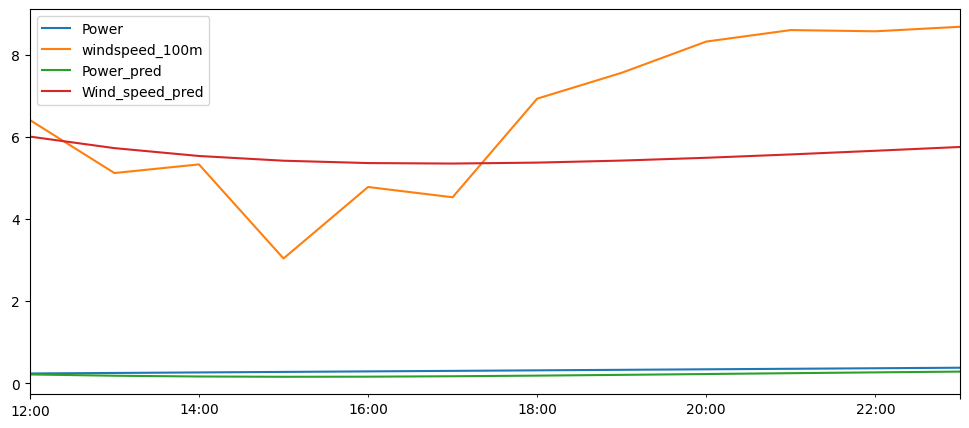

In [79]:
test_vs_pred=pd.concat([test_var,predictions],axis=1)
test_vs_pred.plot(figsize=(12,5))

In [85]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_power=math.sqrt(mean_squared_error(predictions['Power_pred'],test_var['Power']))
print('Mean value of Power is : {}. Root Mean Squared Error is :{}'.format(mean(test_var['Power']),rmse_power))

rmse_wind=math.sqrt(mean_squared_error(predictions['Wind_speed_pred'],test_var['windspeed_100m']))
print('Mean value of windspeed_100m is : {}. Root Mean Squared Error is :{}'.format(mean(test_var['windspeed_100m']),rmse_wind))

Mean value of Power is : 0.31080833333333335. Root Mean Squared Error is :0.10718683161808881
Mean value of windspeed_100m is : 6.489166666666667. Root Mean Squared Error is :2.008737834962994


##### ARIMA (AutoRegressive Integrated Moving Average):

Stationary check:

In [88]:
from statsmodels.tsa.stattools import adfuller

def ad_test(train):
    dftest = adfuller(train,autolag = "AIC")
    print("1.ADF: ",dftest[0])
    print("2.p-value: ",dftest[1])
    print("3.num of lags: ",dftest[2])
    print("4.num of observations used for adf and critical calc: ",dftest[3])
    print("5.critical values: ")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

adfuller: datastet stationary mi değil mi diye kontrol edilen bir kitaplık    
burada en önemli veri p-value bu olasılığın yüksek olması stationary olmadığını gösterir. Bizde düşük yani stationary.

In [89]:
ad_test(train["Power"])

1.ADF:  -17.911663897088943
2.p-value:  2.9280127994482e-30
3.num of lags:  52
4.num of observations used for adf and critical calc:  32803
5.critical values: 
	 1% : -3.4305493662712343
	 5% : -2.8616281147794647
	 10% : -2.566816900760065


ARIMA model 2 kısımdan oluşuyor:  
1-AR(Auto Regression): önceki değerleri kullanarak bir sonraki değeri tahmin etme  
2-IMA(ıntegrated moving average): ıntegrated farkı demek, MA kısmı ise önceki errorları hesaplayarak ileriyi tahmin etmesine denir.

In [92]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

trace=True ---> her stepte bilgileri yazdırıyor.   
auto_arima ---> farklı kombinasyonları deneyerek farklı AIC skorları çıkartıyor. Biz burada en düşük AIC değerini arıyoruz.

In [93]:
stepwise_fit = auto_arima(train["Power"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-209385.847, Time=29.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-126755.992, Time=3.80 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-184950.436, Time=2.72 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=13.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-126757.991, Time=2.71 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-208997.293, Time=43.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-209048.130, Time=34.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-209485.462, Time=56.65 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-208555.755, Time=40.51 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-208973.996, Time=62.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-205982.823, Time=63.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-210056.167, Time=54.83 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-209091.261, Time=36.83 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-209951.035, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                32856
Model:               SARIMAX(4, 1, 5)   Log Likelihood              105803.033
Date:                Wed, 22 May 2024   AIC                        -211586.067
Time:                        16:13:29   BIC                        -211502.068
Sample:                    01-02-2017   HQIC                       -211559.231
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9329      0.027     70.385      0.000       1.879       1.987
ar.L2         -2.0696      0.042    -48.917      0.000      -2.153      -1.987
ar.L3          1.4820      0.037     39.838      0.000       1.409       1.555
ar.L4         -0.5358      0.017    -32.159      0.000      -0.568      -0.503
ma.L1         -0.0775      0.028     -2.787      0.005      -0.132      -0.023
ma.L2          0.1363      0.023      5.834      0.000       0.091       0.182
ma.L3          0.6700      0.015     44.594      0.000       0.641       0.699
ma.L4         -0.3113      0.022    -14.001      0.000      -0.355      -0.268
ma.L5          0.1843      0.011     16.454      0.000       0.162       0.206
sigma2      9.353e-05   3.42e-07    273.675      0.000    9.29e-05    9.42e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):            538713.19
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                        22.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
from statsmodels.tsa.arima.model import ARIMA

train_arima = train[:-30]
test_arima = train[-30:]

model = ARIMA(train_arima["Power"],order=(4,1,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Power   No. Observations:                32826
Model:                 ARIMA(4, 1, 5)   Log Likelihood              105740.871
Date:                Thu, 23 May 2024   AIC                        -211461.743
Time:                        02:53:55   BIC                        -211377.753
Sample:                    01-02-2017   HQIC                       -211434.909
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9455      0.034     57.103      0.000       1.879       2.012
ar.L2         -2.0904      0.046    -45.611      0.000      -2.180      -2.001
ar.L3          1.4574      0.039     37.518      0.000       1.381       1.534
ar.L4         -0.5054      0.019    -27.286      0.000      -0.542      -0.469
ma.L1         -0.0908      0.034     -2.637      0.008      -0.158      -0.023
ma.L2          0.1201      0.028      4.301      0.000       0.065       0.175
ma.L3          0.7306      0.013     57.467      0.000       0.706       0.756
ma.L4         -0.2978      0.027    -10.866      0.000      -0.352      -0.244
ma.L5          0.1450      0.015      9.539      0.000       0.115       0.175
sigma2      9.305e-05   3.36e-07    276.965      0.000    9.24e-05    9.37e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):            526628.73
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                        22.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
start = len(train_arima)
end = len(train_arima) + len(test_arima) - 1
pred = model.predict(start=start,end=end,typ="levels")
print(pred)

2020-09-30 18:00:00    0.563412
2020-09-30 19:00:00    0.540162
2020-09-30 20:00:00    0.534447
2020-09-30 21:00:00    0.533391
2020-09-30 22:00:00    0.534235
2020-09-30 23:00:00    0.541506
2020-10-01 00:00:00    0.555237
2020-10-01 01:00:00    0.568513
2020-10-01 02:00:00    0.575809
2020-10-01 03:00:00    0.578586
2020-10-01 04:00:00    0.581146
2020-10-01 05:00:00    0.584243
2020-10-01 06:00:00    0.585279
2020-10-01 07:00:00    0.583145
2020-10-01 08:00:00    0.580050
2020-10-01 09:00:00    0.578432
2020-10-01 10:00:00    0.578123
2020-10-01 11:00:00    0.577469
2020-10-01 12:00:00    0.576052
2020-10-01 13:00:00    0.575027
2020-10-01 14:00:00    0.575200
2020-10-01 15:00:00    0.575944
2020-10-01 16:00:00    0.576252
2020-10-01 17:00:00    0.576067
2020-10-01 18:00:00    0.576058
2020-10-01 19:00:00    0.576503
2020-10-01 20:00:00    0.576960
2020-10-01 21:00:00    0.577000
2020-10-01 22:00:00    0.576776
2020-10-01 23:00:00    0.576697
Freq: H, Name: predicted_mean, dtype: fl

<AxesSubplot:xlabel='Time'>

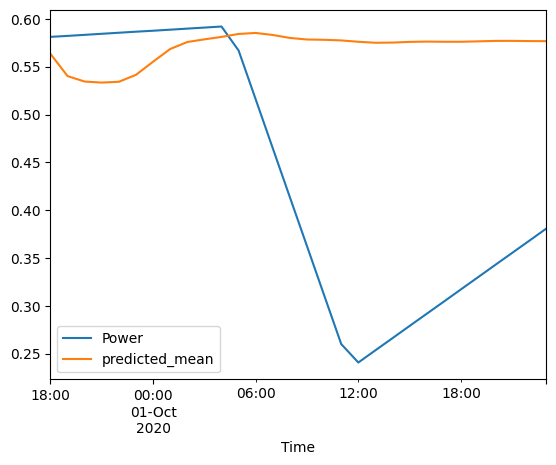

In [119]:
test_arima["Power"].plot(legend=True)
pred.plot(legend=True)

Notlar:
çok kötü sonuç aldım genel power ortalamsıyla ilerliyor gibi bence daha kısa periyotlarlar eğitmek(1 yıl veya aylık gibi) daha mantıklı sonuçlar verdirebilir.   
ayrıca modeli eğitmesi ve doğru lagları bulması da çok uzun sürdü(23dk)